In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#!pip install --upgrade plotly
!pip install dash

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


import warnings
warnings.filterwarnings("ignore")

In [4]:
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")
check = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
df = df[df["date"] > "2020-04-30"]

In [8]:
features = ["location", "date", "new_deaths", "population", "total_cases"]

In [9]:
df = df[features]

In [10]:
dataset_India = df[df["location"] == "India"]
dataset_USA = df[df["location"] == "United States"]
dataset_UK = df[df["location"] == "United Kingdom"]
dataset_Canada = df[df["location"] == "Canada"]
dataset_Italy = df[df["location"] == "Italy"]

In [11]:
dataset_India.head()

,location,date,new_deaths,population,total_cases
38760,India,2020-05-01,69.0,1.380004e+09,37257.0
38761,India,2020-05-02,100.0,1.380004e+09,39699.0
38762,India,2020-05-03,68.0,1.380004e+09,42505.0
38763,India,2020-05-04,175.0,1.380004e+09,46437.0
38764,India,2020-05-05,127.0,1.380004e+09,49400.0


In [12]:
dataset_India["Mortality_Rate"] = " "
dataset_USA["Mortality_Rate"] = " "
dataset_UK["Mortality_Rate"] = " "
dataset_Canada["Mortality_Rate"] = " "
dataset_Italy["Mortality_Rate"] = " "

In [13]:
dataset_India["Mortality_Rate"] = dataset_India["new_deaths"]/dataset_India["population"]
dataset_USA["Mortality_Rate"] = dataset_USA["new_deaths"]/dataset_USA["population"]
dataset_UK["Mortality_Rate"] = dataset_UK["new_deaths"]/dataset_UK["population"]
dataset_Canada["Mortality_Rate"] = dataset_Canada["new_deaths"]/dataset_Canada["population"]
dataset_Italy["Mortality_Rate"] = dataset_Italy["new_deaths"]/dataset_Italy["population"]

In [14]:
dataset_India.head()

,location,date,new_deaths,population,total_cases,Mortality_Rate
38760,India,2020-05-01,69.0,1.380004e+09,37257.0,4.999984e-08
38761,India,2020-05-02,100.0,1.380004e+09,39699.0,7.246354e-08
38762,India,2020-05-03,68.0,1.380004e+09,42505.0,4.927521e-08
38763,India,2020-05-04,175.0,1.380004e+09,46437.0,1.268112e-07
38764,India,2020-05-05,127.0,1.380004e+09,49400.0,9.202869e-08


In [15]:
dataset_USA.head()

,location,date,new_deaths,population,total_cases,Mortality_Rate
88748,United States,2020-05-01,1914.0,331002647.0,1116012.0,0.000006
88749,United States,2020-05-02,1730.0,331002647.0,1143360.0,0.000005
88750,United States,2020-05-03,1197.0,331002647.0,1167681.0,0.000004
88751,United States,2020-05-04,1389.0,331002647.0,1191749.0,0.000004
88752,United States,2020-05-05,2216.0,331002647.0,1216277.0,0.000007


In [16]:
dataset_UK.head()

,location,date,new_deaths,population,total_cases,Mortality_Rate
88248,United Kingdom,2020-05-01,700.0,67886004.0,183501.0,0.000010
88249,United Kingdom,2020-05-02,585.0,67886004.0,186731.0,0.000009
88250,United Kingdom,2020-05-03,253.0,67886004.0,189708.0,0.000004
88251,United Kingdom,2020-05-04,273.0,67886004.0,193091.0,0.000004
88252,United Kingdom,2020-05-05,725.0,67886004.0,196780.0,0.000011


In [17]:
dataset_Canada.head()

,location,date,new_deaths,population,total_cases,Mortality_Rate
15216,Canada,2020-05-01,202.0,37742157.0,56343.0,0.000005
15217,Canada,2020-05-02,148.0,37742157.0,57926.0,0.000004
15218,Canada,2020-05-03,140.0,37742157.0,60504.0,0.000004
15219,Canada,2020-05-04,242.0,37742157.0,61957.0,0.000006
15220,Canada,2020-05-05,170.0,37742157.0,63215.0,0.000005


In [18]:
dataset_Italy.head()

,location,date,new_deaths,population,total_cases,Mortality_Rate
42208,Italy,2020-05-01,269.0,60461828.0,207428.0,0.000004
42209,Italy,2020-05-02,474.0,60461828.0,209328.0,0.000008
42210,Italy,2020-05-03,174.0,60461828.0,210717.0,0.000003
42211,Italy,2020-05-04,195.0,60461828.0,211938.0,0.000003
42212,Italy,2020-05-05,236.0,60461828.0,213013.0,0.000004


In [19]:
#the hover value is the Total Cases

fig = px.area(dataset_India, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (India)", color_discrete_sequence = [rec, dth], hover_name = "total_cases",  )
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [20]:
fig = px.area(dataset_USA, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (USA)", color_discrete_sequence = [rec, dth], hover_name = "total_cases")
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [21]:
fig = px.area(dataset_UK, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (UK)", color_discrete_sequence = [rec, dth], hover_name = "total_cases")
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [22]:
fig = px.area(dataset_Canada, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (Canada)", color_discrete_sequence = [rec, dth], hover_name = "total_cases")
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [23]:
fig = px.area(dataset_Italy, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (Italy)", color_discrete_sequence = [rec, dth], hover_name = "total_cases")
fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [24]:
#f, ax = plt.subplots(figsize = (16,5))
px.line(dataset_India,  dataset_India["date"], dataset_India["new_deaths"], title = "Number of Deaths (India)")#, linewidth = 3)
#plt.xticks(rotation = 40)

In [25]:
px.line(dataset_USA, dataset_USA["date"], dataset_USA["new_deaths"], title = "Number of Deaths (USA)")#, linewidth = 3)

In [26]:
px.line(dataset_UK, dataset_UK["date"], dataset_UK["new_deaths"], title = "Number of Deaths (UK)")

In [27]:
px.line(dataset_Canada, dataset_Canada["date"], dataset_Canada["new_deaths"], title = "Number of Deaths (Canada)")

In [28]:
px.line(dataset_Italy, dataset_Italy["date"], dataset_Italy["new_deaths"], title = "Number of Deaths (Italy)")

In [29]:
c = [dataset_Canada, dataset_India, dataset_Italy, dataset_UK, dataset_USA]
dataset = pd.concat(c)

In [30]:
dataset

,location,date,new_deaths,population,total_cases,Mortality_Rate
15216,Canada,2020-05-01,202.0,37742157.0,56343.0,5.352105e-06
15217,Canada,2020-05-02,148.0,37742157.0,57926.0,3.921345e-06
15218,Canada,2020-05-03,140.0,37742157.0,60504.0,3.709380e-06
15219,Canada,2020-05-04,242.0,37742157.0,61957.0,6.411928e-06
15220,Canada,2020-05-05,170.0,37742157.0,63215.0,4.504247e-06
...,...,...,...,...,...,...
89143,United States,2021-05-31,142.0,331002647.0,33267507.0,4.289996e-07
89144,United States,2021-06-01,638.0,331002647.0,33290450.0,1.927477e-06
89145,United States,2021-06-02,610.0,331002647.0,33307363.0,1.842886e-06
89146,United States,2021-06-03,601.0,331002647.0,33326437.0,1.815695e-06


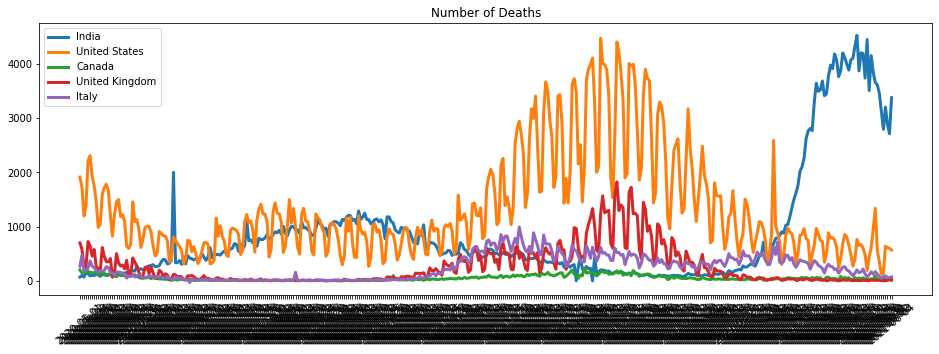

In [31]:
def pltCountry_fatalities(Fatalities, *argv):
  f, ax = plt.subplots(figsize = (16, 5))
  labels = argv
  #print(labels)     #('China',)
  for i in argv:
    #print(i)
    #print(i)       #China
    country = dataset.loc[(dataset["location"] == i)]
    #px.line(country, country["date"], country["new_deaths"], title =  "Number of Deaths (Canada)")

    plt.plot(country["date"], country["new_deaths"], linewidth = 3)
    plt.xticks(rotation = 40)
    plt.legend(labels)
    #px.legend(labels)
    ax.set(title = "Number of Deaths")

pltCountry_fatalities("new_deaths", "India","United States", "Canada", "United Kingdom", "Italy")

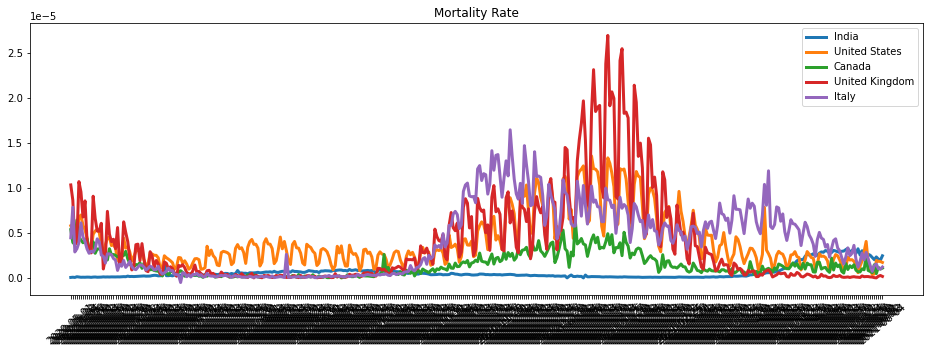

In [32]:
def pltCountry_fatalities(Fatalities, *argv):
  f, ax = plt.subplots(figsize = (16, 5))
  labels = argv
  #print(labels)     #('China',)
  for i in argv:
    #print(i)       #China
    country = dataset.loc[(dataset["location"] == i)]
    plt.plot(country["date"], country["Mortality_Rate"], linewidth = 3)
    plt.xticks(rotation = 40)
    plt.legend(labels)
    ax.set(title = "Mortality Rate")

pltCountry_fatalities("Mortality_Rate", "India","United States", "Canada", "United Kingdom", "Italy")

In [33]:
dataset_date = dataset.copy()

In [34]:
dataset_date.set_index(keys = "date", inplace = True)

In [35]:
dataset_date.drop(labels = ["population", "total_cases", "Mortality_Rate"], axis = 1, inplace = True)

In [36]:
dataset_date.tail()

,location,new_deaths
date,,
2021-05-31,United States,142.0
2021-06-01,United States,638.0
2021-06-02,United States,610.0
2021-06-03,United States,601.0
2021-06-04,United States,567.0


In [37]:
dataset_Canada1 = dataset_Canada.copy()

In [38]:
dataset_Canada1.head()

,location,date,new_deaths,population,total_cases,Mortality_Rate
15216,Canada,2020-05-01,202.0,37742157.0,56343.0,0.000005
15217,Canada,2020-05-02,148.0,37742157.0,57926.0,0.000004
15218,Canada,2020-05-03,140.0,37742157.0,60504.0,0.000004
15219,Canada,2020-05-04,242.0,37742157.0,61957.0,0.000006
15220,Canada,2020-05-05,170.0,37742157.0,63215.0,0.000005


In [39]:
dataset_Canada1.drop(labels = ["population", "total_cases", "Mortality_Rate"], inplace = True, axis  = 1, )

In [40]:
dataset_Canada1.set_index(keys = "date", inplace = True)

In [41]:
dataset_Canada1

,location,new_deaths
date,,
2020-05-01,Canada,202.0
2020-05-02,Canada,148.0
2020-05-03,Canada,140.0
2020-05-04,Canada,242.0
2020-05-05,Canada,170.0
...,...,...
2021-05-31,Canada,55.0
2021-06-01,Canada,18.0
2021-06-02,Canada,44.0


In [42]:
fig = go.Figure([go.Scatter(x = dataset['date'], y = dataset['new_deaths'])])
fig.show()

In [43]:
dataset.tail()

,location,date,new_deaths,population,total_cases,Mortality_Rate
89143,United States,2021-05-31,142.0,331002647.0,33267507.0,4.289996e-07
89144,United States,2021-06-01,638.0,331002647.0,33290450.0,1.927477e-06
89145,United States,2021-06-02,610.0,331002647.0,33307363.0,1.842886e-06
89146,United States,2021-06-03,601.0,331002647.0,33326437.0,1.815695e-06
89147,United States,2021-06-04,567.0,331002647.0,33343297.0,1.712977e-06


In [44]:
fig = px.bar(dataset_Canada1, x = dataset_Canada1.index, y = "new_deaths")
fig.show()

In [45]:
 dataset

,location,date,new_deaths,population,total_cases,Mortality_Rate
15216,Canada,2020-05-01,202.0,37742157.0,56343.0,5.352105e-06
15217,Canada,2020-05-02,148.0,37742157.0,57926.0,3.921345e-06
15218,Canada,2020-05-03,140.0,37742157.0,60504.0,3.709380e-06
15219,Canada,2020-05-04,242.0,37742157.0,61957.0,6.411928e-06
15220,Canada,2020-05-05,170.0,37742157.0,63215.0,4.504247e-06
...,...,...,...,...,...,...
89143,United States,2021-05-31,142.0,331002647.0,33267507.0,4.289996e-07
89144,United States,2021-06-01,638.0,331002647.0,33290450.0,1.927477e-06
89145,United States,2021-06-02,610.0,331002647.0,33307363.0,1.842886e-06
89146,United States,2021-06-03,601.0,331002647.0,33326437.0,1.815695e-06
